Web scrapping to get the dataset

In [8]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = 'https://www.flipkart.com/all/~cs-7847646c0fa813bb0b1d71a25db94e79/pr?sid=0pm%2Cfcn%2C821%2Ca7x%2C2si&marketplace=FLIPKART&restrictLocale=true&page={}'

with open("C:\\Users\\raji\\Desktop\\ML files\\dataset.csv", 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand Name', 'Rating', 'Price'])
    for page in range(1, 11):
        print(f"Scraping page {page}...")
        url = base_url.format(page)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        brand_names = soup.find_all('a', class_='wjcEIp')
        pro_rating = soup.find_all('div', class_='XQDdHH')
        price_tag = soup.find_all('div', class_='Nx9bqj')
        for i in range(len(brand_names)):
            name = brand_names[i].text.strip().split()[0]  # Get the first word
            rating = pro_rating[i].text.strip()
            price = price_tag[i].text.strip().replace('₹', '').replace(',', '')
            writer.writerow([name, rating, price])

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\raji\\Desktop\\ML files\\dataset.csv")
print(df)

     Brand Name  Rating  Price
0         Aroma     3.8    493
1         Aroma     3.6    399
2         Apple     4.6  17999
3         Apple     4.5   7499
4          boAt     4.0    899
..          ...     ...    ...
395   BULLSTORM     3.5    357
396       REDMI     4.2   1999
397  Microflash     3.8    529
398      Number     4.3   1099
399       Boult     3.6    999

[400 rows x 3 columns]


In [7]:
brand_group = df.groupby('Brand Name').size()
print(brand_group)

Brand Name
Apple          2
Aroma         45
BULLSTORM      3
Bashaam        1
Boult         55
Brolan         1
CMF            4
GUGGU          3
HOPPUP        13
HOUSE          2
JBL            2
Lexolt         3
MZ             1
Microflash     8
Mivi          79
NOPE           4
Noise         23
Nothing        4
Number         4
OPPO           1
OnePlus        3
Portronics     2
REDMI          5
ROAR           1
SAMSUNG        1
SONY           1
Shamsa         2
TECHFIRE       6
TECHNUV        1
TRIGGR        31
Wireless       1
ZEBRONICS      1
boAt          50
moto           1
realme        14
truke         20
vivo           2
dtype: int64


In [10]:
brands_to_remove = brand_group[brand_group < 10].index
df_filtered = df[~df['Brand Name'].isin(brands_to_remove)]
print(df_filtered)
brand_group = df_filtered.groupby('Brand Name').size()
print(brand_group)

    Brand Name  Rating  Price
0        Aroma     3.8    493
1        Aroma     3.6    399
4         boAt     4.0    899
5         Mivi     3.9    799
6        Noise     4.0   1199
..         ...     ...    ...
391      Boult     4.1    999
392     realme     4.4   4999
393       boAt     3.9   1299
394      Boult     4.1   1199
399      Boult     3.6    999

[330 rows x 3 columns]
Brand Name
Aroma     45
Boult     55
HOPPUP    13
Mivi      79
Noise     23
TRIGGR    31
boAt      50
realme    14
truke     20
dtype: int64


In [12]:
df=pd.read_csv("C:\\Users\\raji\\Desktop\\ML files\\filtered_dataset.csv")
print(df)
print(df.describe())

    Brand Name  Rating  Price
0        Aroma     3.8    493
1        Aroma     3.6    399
2         boAt     4.0    899
3         Mivi     3.9    799
4        Noise     4.0   1199
..         ...     ...    ...
325      Boult     4.1    999
326     realme     4.4   4999
327       boAt     3.9   1299
328      Boult     4.1   1199
329      Boult     3.6    999

[330 rows x 3 columns]
           Rating        Price
count  330.000000   330.000000
mean     3.975152  1120.060606
std      0.154135   626.578631
min      3.500000   299.000000
25%      3.900000   799.000000
50%      4.000000   999.000000
75%      4.100000  1199.000000
max      4.400000  4999.000000


Implementing EDA

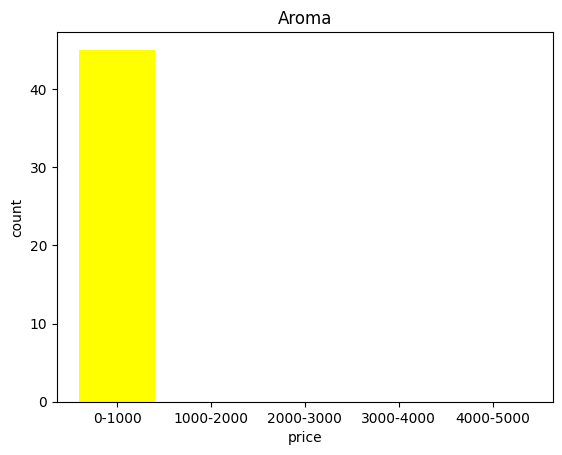

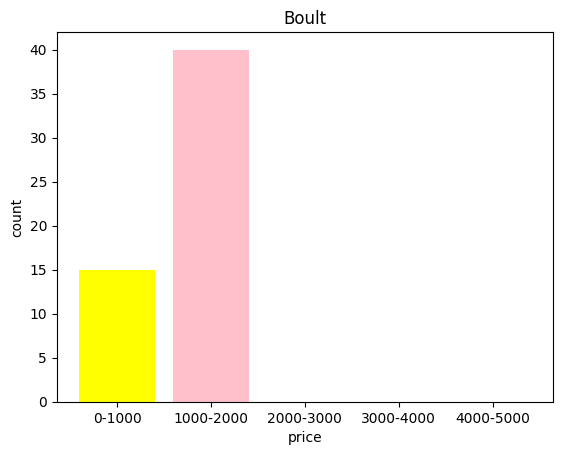

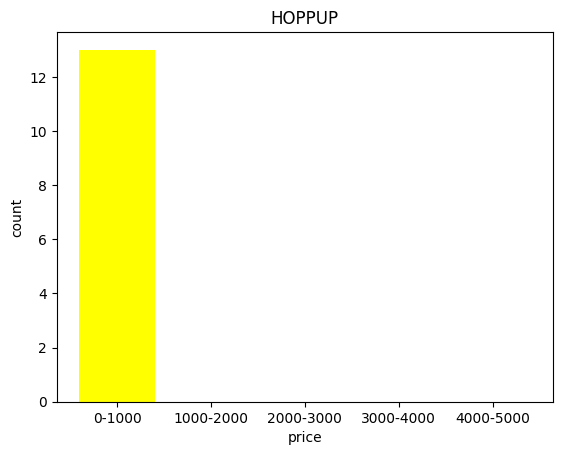

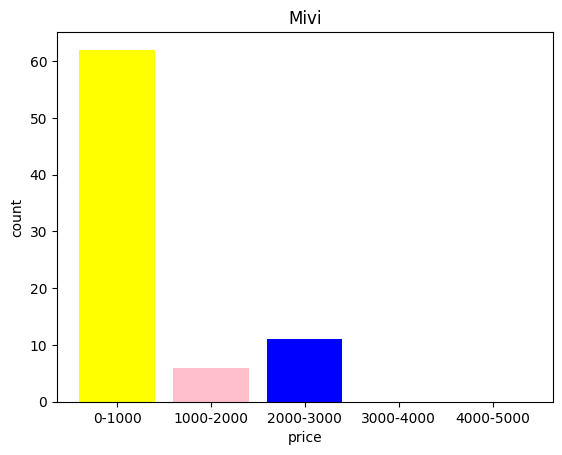

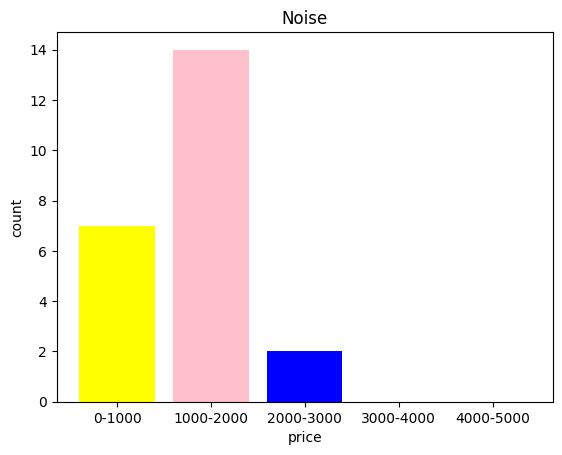

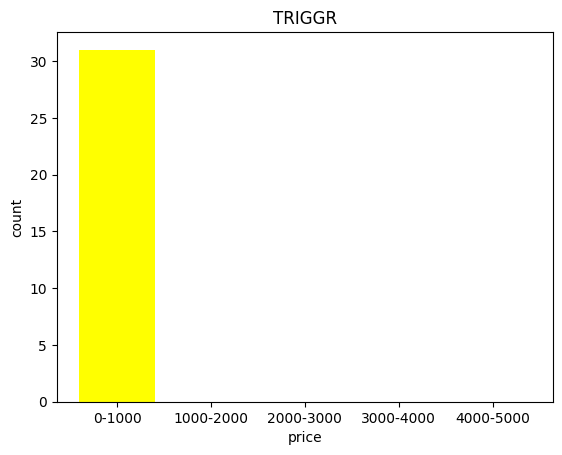

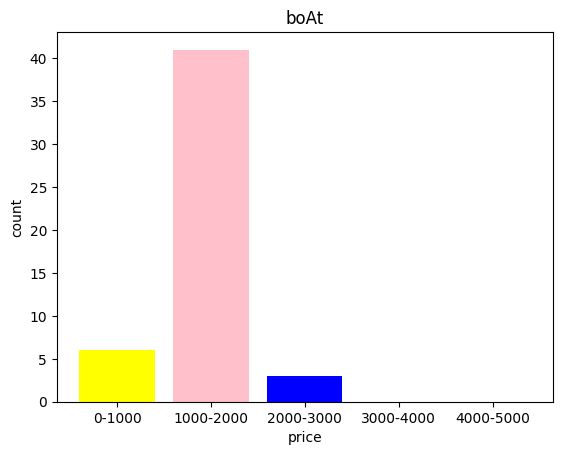

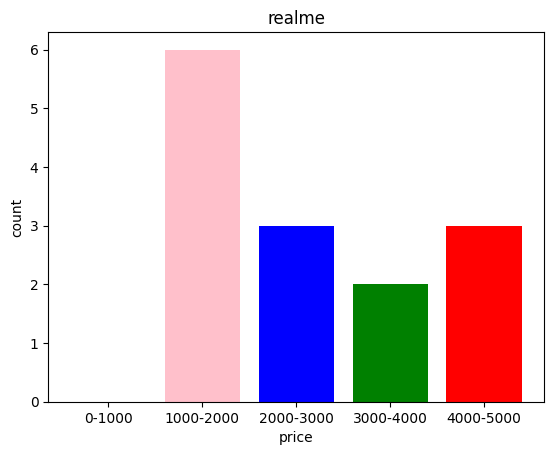

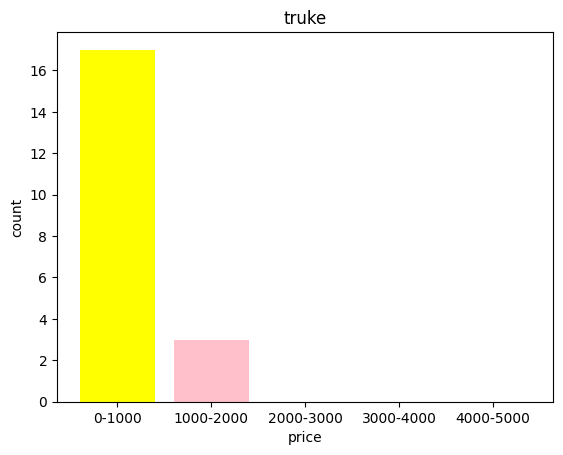

In [13]:
brands=['Aroma','Boult','HOPPUP','Mivi','Noise','TRIGGR','boAt','realme','truke']
def plot_bar(brand):
    price_1000=df[(df['Brand Name'] == brand) & (df['Price'] < 1000)]
    price_2000=df[(df['Brand Name'] == brand) & (df['Price'] > 1000) & (df['Price'] < 2000)]
    price_3000=df[(df['Brand Name'] == brand) & (df['Price'] > 2000) & (df['Price'] < 3000)]
    price_4000=df[(df['Brand Name'] == brand) & (df['Price'] > 3000) & (df['Price'] < 4000)]
    price_5000=df[(df['Brand Name'] == brand) & (df['Price'] > 4000) & (df['Price'] < 5000)]
    prices=[price_1000.shape[0],price_2000.shape[0],price_3000.shape[0],price_4000.shape[0],price_5000.shape[0]]
    plt.bar(['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'], prices,
            color=['yellow', 'pink', 'blue', 'green', 'red'])
    plt.title(brand)
    plt.xlabel('price')
    plt.ylabel('count')
    plt.show()

for brand in brands:
    plot_bar(brand)


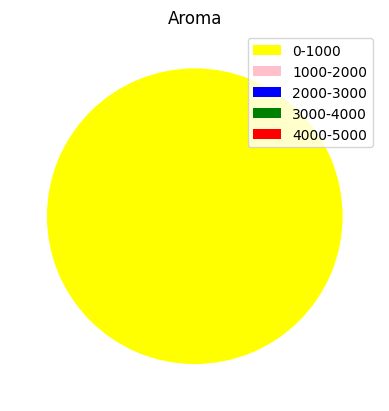

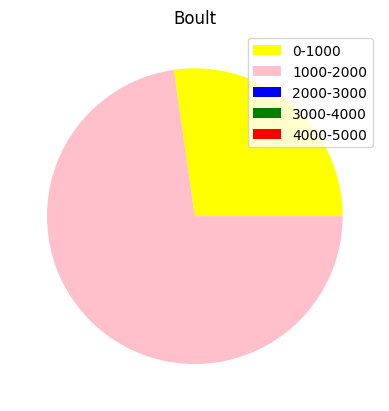

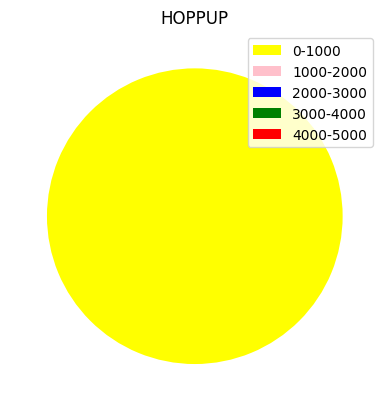

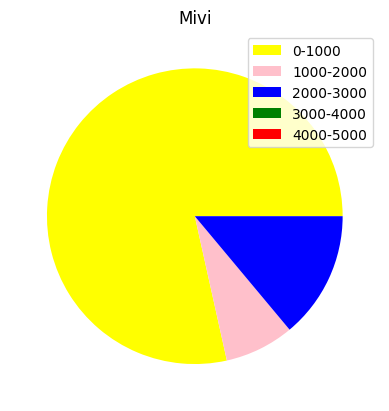

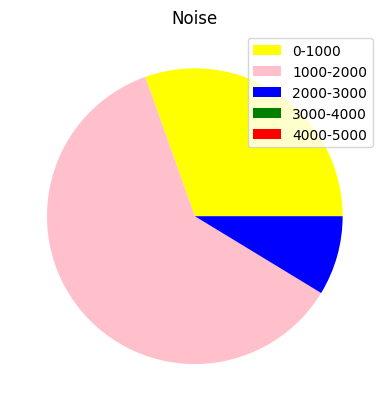

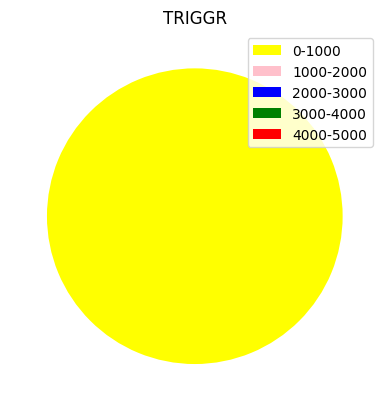

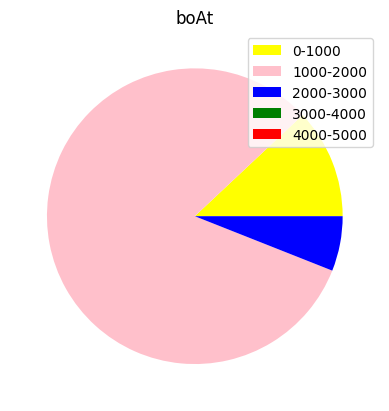

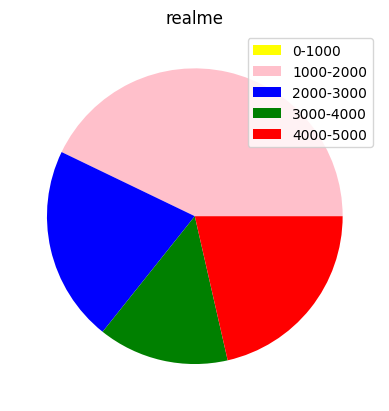

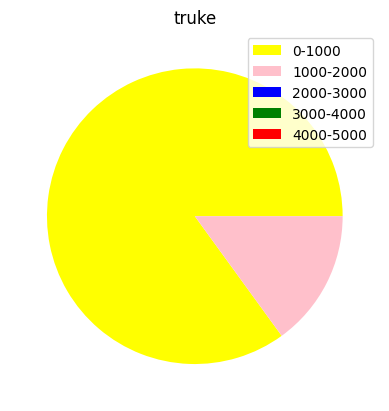

In [14]:
def plot_pie(brand):
    price_1000=df[(df['Brand Name'] == brand) & (df['Price'] < 1000)]
    price_2000=df[(df['Brand Name'] == brand) & (df['Price'] > 1000) & (df['Price'] < 2000)]
    price_3000=df[(df['Brand Name'] == brand) & (df['Price'] > 2000) & (df['Price'] < 3000)]
    price_4000=df[(df['Brand Name'] == brand) & (df['Price'] > 3000) & (df['Price'] < 4000)]
    price_5000=df[(df['Brand Name'] == brand) & (df['Price'] > 4000) & (df['Price'] < 5000)]
    prices=[price_1000.shape[0],price_2000.shape[0],price_3000.shape[0],price_4000.shape[0],price_5000.shape[0]]
    labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000']
    colors = ['yellow', 'pink', 'blue', 'green', 'red']
    plt.pie(prices,labels=None,colors=colors)
    plt.legend(labels=labels, loc='upper right')
    plt.title(brand)
    plt.show()

for brand in brands:
    plot_pie(brand)

Data visualization by power BI


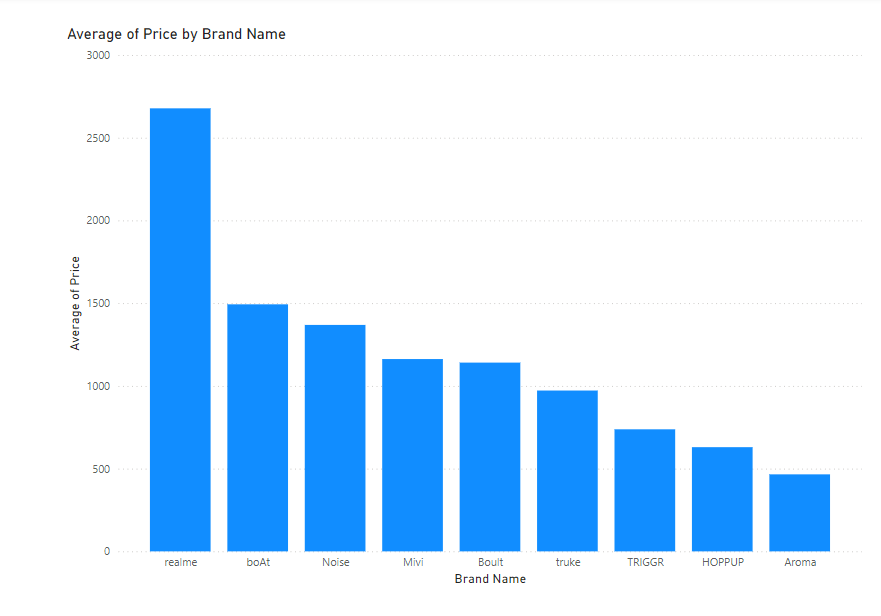


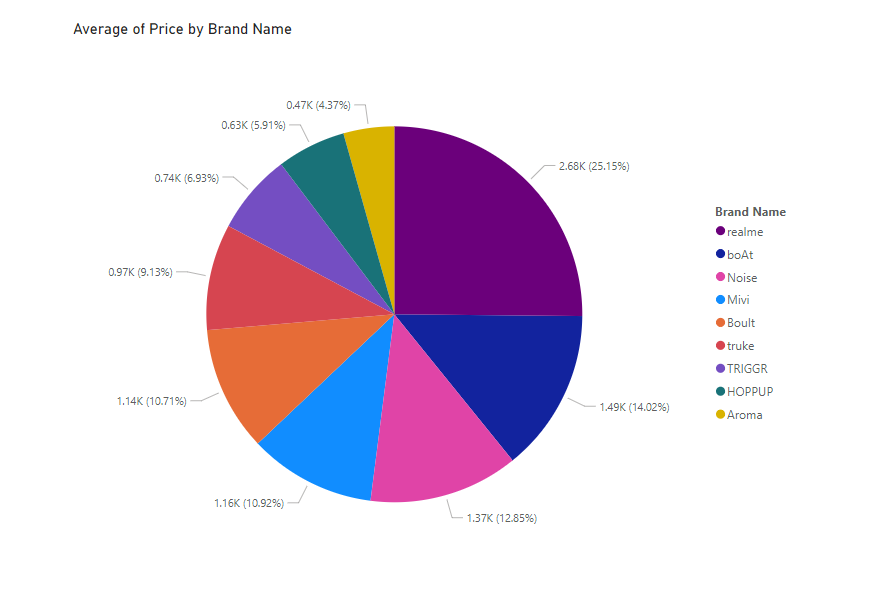

Data preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv("C:\\Users\\raji\\Desktop\\ML files\\filtered_dataset.csv")
encoder = LabelEncoder()
df['Brand Name'] = encoder.fit_transform(df['Brand Name'])
x=df.drop(['Price'],axis=1)
y=df['Price']
print(x.head(10))
print(y.head(10))
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

   Brand Name  Rating
0           0     3.8
1           0     3.6
2           6     4.0
3           3     3.9
4           4     4.0
5           4     4.0
6           7     4.2
7           6     4.1
8           3     3.9
9           1     4.1
0     493
1     399
2     899
3     799
4    1199
5    1199
6    1499
7    1999
8     999
9    1099
Name: Price, dtype: int64


Model Building and Evaluation

In [47]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain,ytrain)
ypredict=model1.predict(xtest)
score1=model1.score(xtest,ytest)
print(f"model_1 score is {score1}")

model_1 score is 0.46064881977852845


In [53]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(xtrain,ytrain)
ypredict=model2.predict(xtest)
score2=model2.score(xtest,ytest)
print(f"model_2 score is {score2}")

model_2 score is 0.6060606060606061
